<div style="text-align:center; color:#AE2F88; font-size:90px">
Détection Du Paludisme
</br>
<img src="./pic_of_blood_cells.png" style="width:900px; height:auto">
</div>

## <span style="color: #AE2F88; font-size:60px">Introduction :</span>

-  Le paludisme, une maladie grave transmise par les moustiques, affecte des millions chaque année, surtout dans les régions tropicales.
-  Actuellement, le diagnostic repose sur l'examen microscopique des frottis sanguins, nécessitant une expertise médicale.
-  Ce projet développe un modèle de réseau neuronal pour différencier rapidement et avec précision les cellules sanguines infectées par le paludisme des cellules saines
-  Structure de projet :
    - 1.Manipulation de la Donnée : Préparation et augmentation des données pour l'entraînement des modèles.
    - 2.Entraînement de Modèles : Implémentation et entraînement de trois modèles CNN différents.
    - 3.Évaluation des Modèles : Test et évaluation des performances des modèles sur un jeu de données de test.

## <span style="color: #AE2F88; font-size:60px">Références :</span>

- Informations sur l'ensemble de données et les fichiers :
    - Données est extrait du site officiel des NIH, lien vers le dataset : <a href="https://ceb.nlm.nih.gov/repositories/malaria-datasets/">NIH link </a>
    - Lien vers le dataset des images : <a href="https://drive.google.com/drive/folders/1BnA8bTFuCeAmhU9rvAyHmzVUMTxFGGAU?usp=sharing">BCI</a>
    - Lien vers poids des modèles : <a href="https://drive.google.com/file/d/1miYwxaa_OUW39GTYA7b5iw2DnJfJqfAf/view?usp=drive_link">Weights.h5</a>
- My-links :
    - Git_hub : <a href="https://github.com/SouLayman2022/Blood_cells_Classification.git">Repo GitHub</a>
    - linked_in : <a href="https://www.linkedin.com/in/soulayman-el-guasmi-13b890240/">Linkedin page</a>
    - Get to know me ! <a href="https://soulayman2022.github.io/Data_Scientist_Portfolio/">My Portfolio page</a>

## <span style="color:#AE2F88; font-size:60px">Table of Contents :</span>
- 1 Manipulation de la Donnée
    - 1.1 [Télécharger les données fournies ](#1.1-Télécharger-les-données-fournies)
    - 1.2 [Charger les données [Pandas, PIL, OpenCV] ](#1.2-Charger-les-données)
    - 1.3 [Normaliser les images ](#1.3-Normaliser-les-images)
    - 1.4 [Encoder les labels ](#1.4-Encoder-les-labels)
    - 1.5 [Faire de la data augmentation ](#1.5-Faire-de-la-data-augmentation)
    - 1.6 [Afficher les images augmentées ](#1.6-Afficher-les-images-augmentées)
- 2 Entraînement de 3 Modèles
    - 2.1 [Implémentation de 2 Callbacks ](#2.1-Implémentation-de-2-Callbacks)
    - 2.2 [Implémentation de 3 CNN pour la Labelisation à l'aide de Keras ](#2.2-Implémentation-de-3-CNN-pour-la-Labelisation-à-l'aide-de-Keras)
    - 2.3 [Entraînement des 3 modèles à l'aide des Callbacks implémentés ](#2.3-Entraînement-des-3-modèles-à-l'aide-des-Callbacks-implémentés)
    - 2.4 [Sauvegarder les poids des 3 différents modèles ](#2.4-Sauvegarder-les-poids-des-3-différents-modèles)
- 3 Test des Modèles
    - 3.1 [Calculer la Matrice de Confusion ](#3.1-Calculer-la-Matrice-de-Confusion)
    - 3.2 [Calculer les métriques de performance ](#3.2-Calculer-les-métriques-de-performance)
    - 3.3 [Afficher le graphique ROC et calcule l’AUC de chacun des 3 modèles ](#3.3-Afficher-le-graphique-ROC-et-calcule-l’AUC-de-chacun-des-3-modèles)
- 4 Conclusion
    - 4.1 [Conclusion](#4.1-Conclusion)

- ## 1 Manipulation des donéées :

### 1.1 Télécharger les données fournies

- Reportez-vous au lien BCI ci-dessus dans la section références.
- Télécharger le fichier compresser qui contient les 2 classes des images 
    - parasitized
    - uninfected

### 1.2 Charger les données

In [1]:
from PIL import Image
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tqdm import tqdm  # pour viisualiser le progrés

In [2]:
# Chemins des dossiers
parasitized_path = 'C:/Users/soula/Desktop/FOAD/malaria_hematie_dataset/malaria_hematie_dataset/parasitized'
uninfected_path = 'C:/Users/soula/Desktop/FOAD/malaria_hematie_dataset/malaria_hematie_dataset/uninfected'

In [3]:
# Preprocesser les images
def preprocess_images(folder_path, target_size=(128, 128)):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            try:
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(folder_path.split('/')[-1])  # Extract label from folder name
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")
    return np.array(images), labels

In [4]:
# Preprocesser les parasitized images
parasitized_images, parasitized_labels = preprocess_images(parasitized_path)

# Preprocesser les uninfected images
uninfected_images, uninfected_labels = preprocess_images(uninfected_path)

100%|██████████| 13779/13779 [00:23<00:00, 579.30it/s]


In [5]:
# Vérifier shape des images
print("Parasitized Image Shapes:", set(img.shape for img in parasitized_images))
print("Uninfected Image Shapes:", set(img.shape for img in uninfected_images))

Parasitized Image Shapes: {(128, 128, 3)}
Uninfected Image Shapes: {(128, 128, 3)}


In [32]:
# Concatenater les données Preprocesser
images = np.concatenate((parasitized_images, uninfected_images))
labels = parasitized_labels + uninfected_labels

### 1.3 Normaliser les images

In [7]:
# Normalisation des images
images_normalized = images / 255.0

### 1.4 Encoder les labels

In [8]:
# Encodage des labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [9]:
# Vérifier les shapes et le nombre des labels
print("Shape of Images:", images.shape)
print("Length of Labels:", len(labels_encoded))

Shape of Images: (27558, 128, 128, 3)
Length of Labels: 27558


### 1.5 Faire de la data augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Augmentation des données
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### 1.6 Afficher les images augmentées

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Affichage d'exemples d'images augmentées
# Choisir une image à augmenter
img = images_normalized[0]
img = img.reshape((1,) + img.shape)

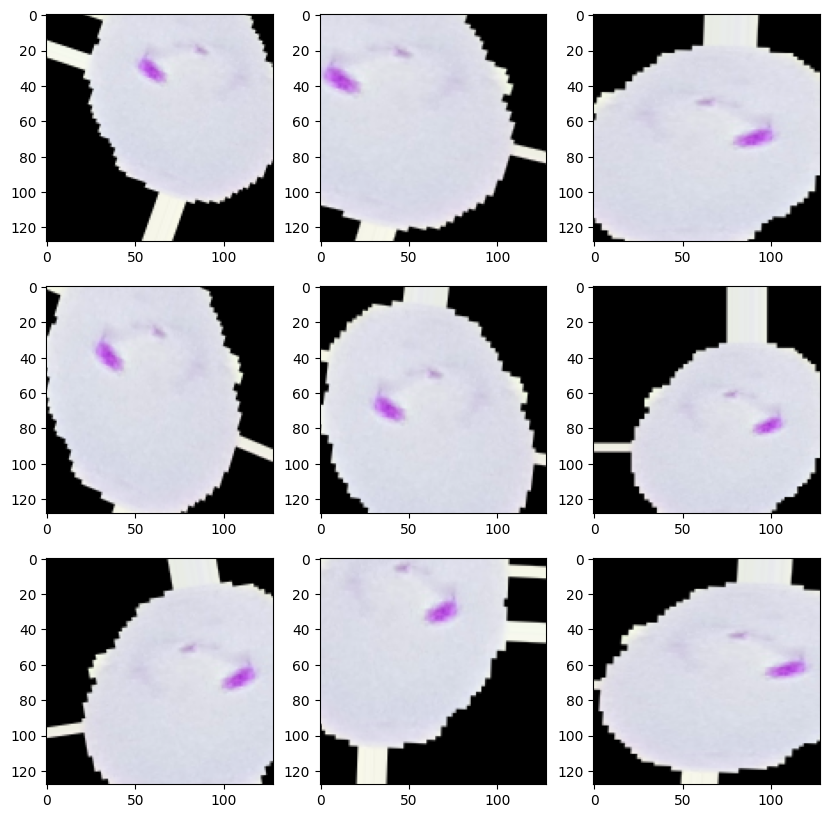

In [14]:
# Afficher quelques exemples d'images augmentées
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0])
    i += 1
    if i % 9 == 0:
        break
plt.show()

- ## 2 Entraînement de 3 Modèles :

### 2.1 Implémentation de 2 Callbacks

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Determiner les dimensions (width and height) pour notre preprocessed images
img_height, img_width, channels = images.shape[1:]

# Determiner le npbbre de classes unique depuis encoded labels : 2 classes
num_classes = len(np.unique(labels_encoded))

# Vérifier le nbr de classe et le input correcte
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

C:\Users\soula\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 2.2 Implémentation de 3 CNN pour la Labelisation à l'aide de Keras

In [16]:
from keras.applications import VGG16
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Récupération de l'encodeur pré-entraîné
for layer in base_model.layers:
    layer.trainable = False

# Ajout des couches Dense
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=predictions)

### 2.3 Entraînement des 3 modèles à l'aide des Callbacks implémentés

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
# Définition des callbacks
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),
    ReduceLROnPlateau(factor=0.1, patience=2, monitor='val_loss')
]

# Compilation et entraînement des modèles
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(images_normalized, labels_encoded, epochs=10, validation_split=0.2, callbacks=callbacks)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 148s 211ms/step - accuracy: 0.6844 - loss: 0.6962 - val_accuracy: 0.9704 - val_loss: 0.2830 - learning_rate: 0.0010
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 137s 199ms/step - accuracy: 0.8976 - loss: 0.3000 - val_accuracy: 0.8901 - val_loss: 0.3088 - learning_rate: 0.0010
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 133s 193ms/step - accuracy: 0.9375 - loss: 0.1963 - val_accuracy: 0.9559 - val_loss: 0.1913 - learning_rate: 0.0010
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 135s 196ms/step - accuracy: 0.9521 - loss: 0.1546 - val_accuracy: 0.9448 - val_loss: 0.1716 - learning_rate: 0.0010
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.9578 - loss: 0.1272 - val_accuracy: 0.9311 - val_loss: 0.1966 - learning_rate: 0.0010
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 135s 195ms/step - accuracy: 0.9671 - loss: 0.1032 - val_accuracy: 0.9073 - val_loss: 0.2558 - learning_rate: 0.0010
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accura

### 2.4 Sauvegarder les poids des 3 différents modèles

In [19]:
# Sauvegarde des poids des modèles
model.save_weights('model_weights.weights.h5')

- ## 3 Test des Modèles :

### 3.1 Calculer la Matrice de Confusion

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [26]:
# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images_normalized, labels_encoded, test_size=0.2, random_state=42)

In [27]:
# Faire des prédictions sur le jeu de test
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", cm)

173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step
Matrice de Confusion :
 [[2766   31]
 [ 113 2602]]


### 3.2 Calculer les métriques de performance

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculer les différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Afficher les métriques
print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("F1-Score :", f1)

# Afficher le rapport de classification
print("Rapport de Classification :\n", classification_report(y_test, y_pred))

Accuracy : 0.9738751814223512
Precision : 0.9882263577668059
Recall : 0.9583793738489871
F1-Score : 0.9730740463724757
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2797
           1       0.99      0.96      0.97      2715

    accuracy                           0.97      5512
   macro avg       0.97      0.97      0.97      5512
weighted avg       0.97      0.97      0.97      5512



### 3.3 Afficher le graphique ROC et calcule l’AUC de chacun des 3 modèles

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step


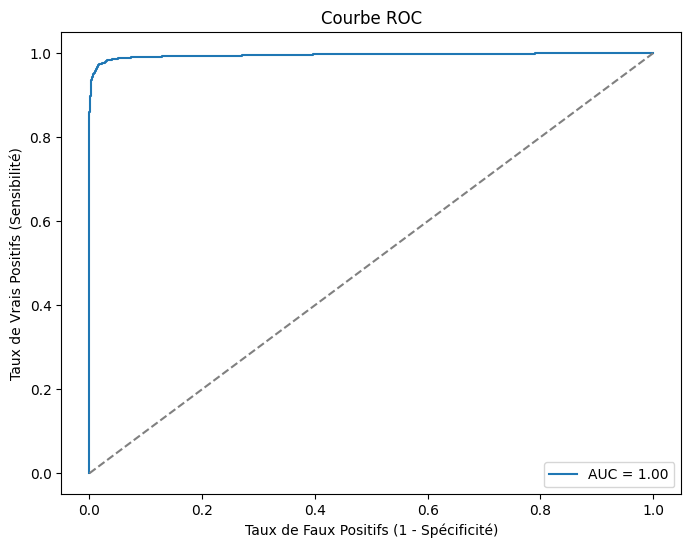

AUC : 0.9954515855254018


In [31]:
# Calculer les scores de probabilité pour les classes positives
y_prob = model.predict(X_test)

# Dans un problème binaire, les probabilités pour la classe positive sont dans la deuxième colonne (index 1)
if y_prob.shape[1] > 1:
    y_prob = y_prob[:, 1]
else:
    y_prob = y_prob.ravel()

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
auc = roc_auc_score(y_test, y_prob)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)')
plt.ylabel('Taux de Vrais Positifs (Sensibilité)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

print("AUC :", auc)

- ## 4 Conclusion :

- On constate que notre score de AUC = 0.9954515855254018 qui tombe vers 1 signifie que notre modèle a une excellente capacité à distinguer entre les cellules infectées et non infectées.
- Un AUC très proche de 1 indique que notre modèle est presque parfait pour cette tâche.